<a href="https://colab.research.google.com/github/Codefedy/Heart-Disease-Predictive-Model/blob/main/HD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install notebook

In [521]:
import numpy as np
import pandas as pd

import seaborn as sns #for plotting

In [522]:
from sklearn.metrics import roc_curve, roc_auc_score, auc #for model evaluation

In [523]:
from sklearn.linear_model import LogisticRegression

In [524]:
from sklearn.ensemble import RandomForestClassifier #for the model

In [525]:
from sklearn.feature_selection import mutual_info_classif


In [526]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [527]:
from sklearn.preprocessing import LabelEncoder

In [528]:
import pydot

In [529]:
from sklearn.preprocessing import StandardScaler

In [530]:
from sklearn.metrics import accuracy_score

In [531]:
from sklearn.tree import export_graphviz #plot tree

In [532]:
from sklearn.tree import DecisionTreeClassifier

In [533]:
from sklearn.metrics import confusion_matrix #for model evaluation


In [534]:
from sklearn.metrics import classification_report #for model evaluation

In [535]:
!pip install eli5 #for purmutation 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [536]:
import eli5


In [537]:
from eli5.sklearn import PermutationImportance

In [672]:
pip install shap #for SHAP values


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [673]:
import shap

In [691]:
shap.initjs()


In [539]:
from sklearn.model_selection import train_test_split #for data splitting

In [459]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade matplotlib==3.1.1 

In [541]:
import matplotlib.pyplot as plt

In [ ]:
!pip install pdpbox

In [544]:
from pdpbox import pdp, info_plots #for partial plots

In [545]:
np.random.seed(123) #ensure reproducibility

In [546]:
pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [547]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [585]:
dp = pd.read_csv('/content/drive/My Drive/UWE-ML/HD_Prediction.csv')

In [586]:
dp.head(6)

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence


Let's clean the data to better understand the analysis and naming conventions. (Also see interpretation for terminologies).
sex will be assigned (1 = male, 0 =female)
Chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
BP is the blood pressure rate of the individual.
Fbs over 120: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
EKG Result: will be assigne restEKG which means Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
MAX HR will be assigned "Maximum heart rate".
Exercise angina: Exercise induced angina (1 = yes; 0 = no). This means chest pain or tightness induced by excercise
ST DEPRESSION:Induced by exercise relative to rest ('ST' relates to positions on the EKG plot).
Slope of ST: The peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping).
Number of vessels fluro: This feature represents a discrete value indicating the count of vessels. For example, it could range from 0 (indicating no vessels colored) to 3 (indicating all three major vessels colored). Each vessel represents a major coronary artery: the left anterior descending (LAD), the left circumflex (LCX), and the right coronary artery (RCA).
Thallium: A toxic heavy metal that can have adverse effects on various organs and systems in the body if ingested or exposed to in large amounts.
Heart Disease: This will be the target to identify persons with or without heart disease. This is represented with "Presence" or "Absence".

Lets improve the analysis interpretation by changing the values of the
categorical vaiables.

In [587]:
dp = dp.drop(dp.columns[0], axis=1)

In [588]:
dp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ekg', 'max_heart_rate',
       'exercise_angina', 'st_depression', 'slope_of_ST', 'num_major_vessels', 'thallium', 'target(HeartDisease)']

In [553]:
le = LabelEncoder()
dp['target(HeartDisease)'] = le.fit_transform(dp['target(HeartDisease)'])


Changing the values of categorical variables to improve interpretation

In [605]:
dp['sex'][dp['sex'] == 'female'] = 0
dp['sex'][dp['sex'] == 'male'] = 1

dp['chest_pain_type'][dp['chest_pain_type'] == 1] = 'typical angina'
dp['chest_pain_type'][dp['chest_pain_type'] == 2] = 'atypical angina'
dp['chest_pain_type'][dp['chest_pain_type'] == 3] = 'non-anginal pain'
dp['chest_pain_type'][dp['chest_pain_type'] == 4] = 'asymptomatic'

dp['fasting_blood_sugar'][dp['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dp['fasting_blood_sugar'][dp['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dp['rest_ekg'][dp['rest_ekg'] == 0] = 'normal'
dp['rest_ekg'][dp['rest_ekg'] == 1] = 'left ventricular hypertrophy'
dp['rest_ekg'][dp['rest_ekg'] == 2] = 'ST-T wave abnormality'

dp['exercise_angina'][dp['exercise_angina'] == 0] = 'no'
dp['exercise_angina'][dp['exercise_angina'] == 1] = 'yes'

dp['slope_of_ST'][dp['slope_of_ST'] == 1] = 'upsloping'
dp['slope_of_ST'][dp['slope_of_ST'] == 2] = 'flat'
dp['slope_of_ST'][dp['slope_of_ST'] == 3] = 'downsloping'

dp['thallium'][dp['thallium'] == 3] = 'normal'
dp['thallium'][dp['thallium'] == 6] = 'fixed defect'
dp['thallium'][dp['thallium'] == 7] = 'reversable defect'

dp['target(HeartDisease)'][dp['target(HeartDisease)'] == 'Absence'] = 0
dp['target(HeartDisease)'][dp['target(HeartDisease)'] == 'Presence'] = 1

In [606]:


dp.dtypes



age                         int64
sex                        object
chest_pain_type            object
resting_blood_pressure      int64
cholesterol                 int64
fasting_blood_sugar        object
rest_ekg                   object
max_heart_rate              int64
exercise_angina            object
st_depression             float64
slope_of_ST                object
num_major_vessels           int64
thallium                   object
target(HeartDisease)        int64
dtype: object

Lets check correctness of the data types.

Not quite right. 

In [607]:


dp['sex'] = dp['sex'].astype('object')
dp['chest_pain_type'] = dp['chest_pain_type'].astype('object')
dp['fasting_blood_sugar'] = dp['fasting_blood_sugar'].astype('object')
dp['rest_ekg'] = dp['rest_ekg'].astype('object')
dp['exercise_angina'] = dp['exercise_angina'].astype('object')
dp['slope_of_ST'] = dp['slope_of_ST'].astype('object')
dp['thallium'] = dp['thallium'].astype('object')
dp['target(HeartDisease)'] = dp['target(HeartDisease)'].astype('int64')



In [608]:
dp.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ekg,max_heart_rate,exercise_angina,st_depression,slope_of_ST,num_major_vessels,thallium,target(HeartDisease)
0,70,1,asymptomatic,130,322,lower than 120mg/ml,ST-T wave abnormality,109,no,2.4,flat,3,normal,1
1,67,0,non-anginal pain,115,564,lower than 120mg/ml,ST-T wave abnormality,160,no,1.6,flat,0,reversable defect,0
2,57,1,atypical angina,124,261,lower than 120mg/ml,normal,141,no,0.3,upsloping,0,reversable defect,1
3,64,1,asymptomatic,128,263,lower than 120mg/ml,normal,105,yes,0.2,flat,1,reversable defect,0
4,74,0,atypical angina,120,269,lower than 120mg/ml,ST-T wave abnormality,121,yes,0.2,upsloping,1,normal,0


Some of the types will be changed to categorical variables for better

creating dummy variables - #ONE HOT CODING

In [609]:
dp_encoded = pd.get_dummies(dp, columns=['thallium'], drop_first=True)

In [610]:


dp = pd.get_dummies(dp, drop_first=True)



In [611]:
dp_encoded = pd.get_dummies(dp, drop_first=True)

In [612]:
print(dp.head())

   age  resting_blood_pressure  cholesterol  max_heart_rate  st_depression  \
0   70                     130          322             109            2.4   
1   67                     115          564             160            1.6   
2   57                     124          261             141            0.3   
3   64                     128          263             105            0.2   
4   74                     120          269             121            0.2   

   num_major_vessels  target(HeartDisease)  sex_1  \
0                  3                     1      1   
1                  0                     0      0   
2                  0                     1      1   
3                  1                     0      1   
4                  1                     0      0   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                                0                                 0   
1                                0                                 1

In [613]:


X_train, X_test, y_train, y_test = train_test_split(dp.drop('target(HeartDisease)', 1), dp['target(HeartDisease)'], test_size=0.2, random_state=10)

Lets check Logistic Regression Model on the dataset.

In [614]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [615]:
y_pred = model.predict(X_test)   # Make predictions on the test set

In [616]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [617]:
sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0])
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])

In [618]:
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Confusion Matrix:
[[21  5]
 [ 6 22]]
Accuracy: 0.8888888888888888
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-score: 0.888888888888889
Sensitivity: 0.7777777777777778
Specificity: 0.8148148148148148


In [619]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.92      0.86      0.89        28

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



In [620]:
auc_roc = roc_auc_score(y_test, y_pred)

In [621]:
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8901098901098902


Applying regularization techniques such as L1 (Lasso) or L2 (Ridge) regularization to prevent overfitting and improve the model's generalization ability.

In [622]:
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model.fit(X_train, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [623]:
accuracy = model.score(X_test, y_test)

In [624]:
print("Accuracy:", accuracy)

Accuracy: 0.8888888888888888


MODEL EVALUATION USING PERMUTATION 

In [625]:

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())



Weight,Feature
0.1259 ± 0.0363,num_major_vessels
0.0630 ± 0.0378,thallium_reversable defect
0.0630 ± 0.0602,sex_1
0.0444 ± 0.0444,chest_pain_type_typical angina
0.0333 ± 0.0791,max_heart_rate
0.0296 ± 0.0378,st_depression
0.0222 ± 0.0277,chest_pain_type_non-anginal pain
0.0148 ± 0.0277,cholesterol
0.0148 ± 0.0277,age
0.0111 ± 0.0181,exercise_angina_yes


In [626]:
print(X_test.columns)

Index(['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate',
       'st_depression', 'num_major_vessels', 'sex_1',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina',
       'fasting_blood_sugar_lower than 120mg/ml',
       'rest_ekg_left ventricular hypertrophy', 'rest_ekg_normal',
       'exercise_angina_yes', 'slope_of_ST_flat', 'slope_of_ST_upsloping',
       'thallium_normal', 'thallium_reversable defect'],
      dtype='object')


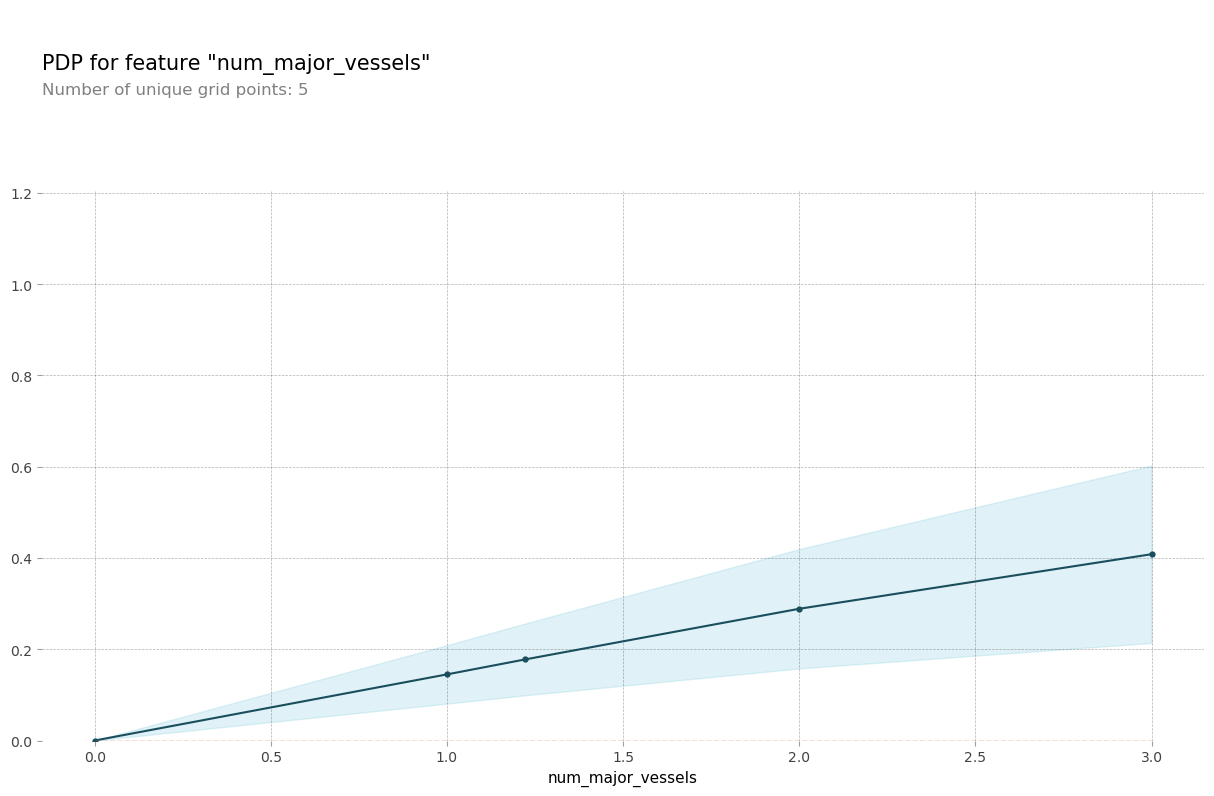

In [627]:
base_features = dp.columns.values.tolist()
base_features.remove('target(HeartDisease)')

feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

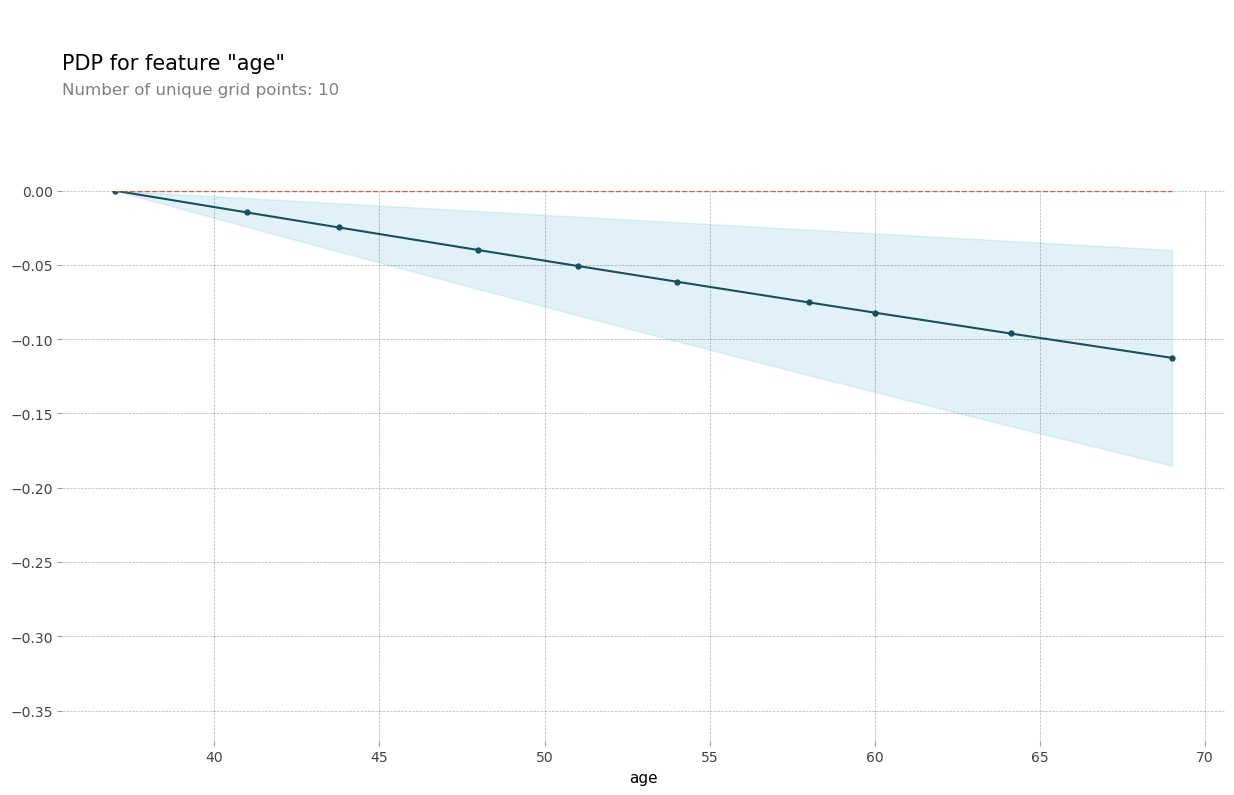

In [628]:
feat_name = 'age'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


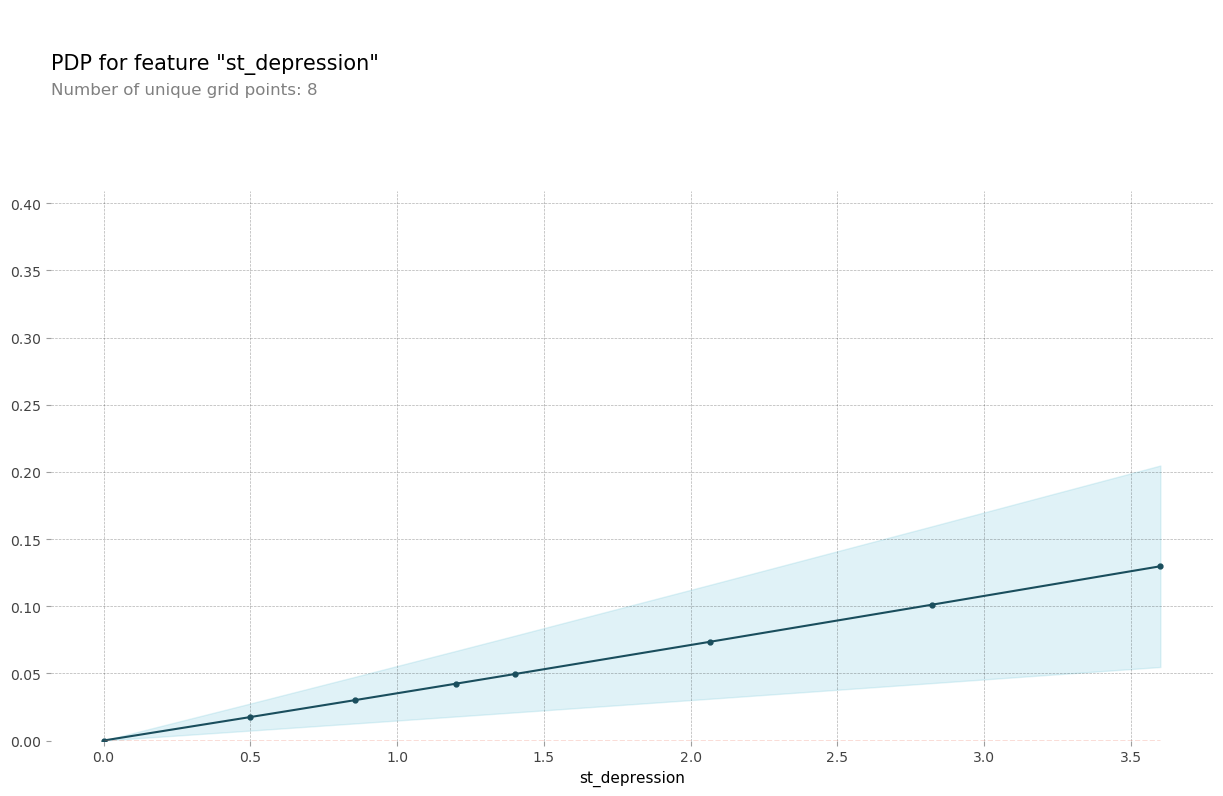

In [629]:


feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

In [ ]:
inter1  =  pdp.pdp_interact(model=model, dataset=X_test, model_features=base_features, features=['slope_of_ST_upsloping', 'st_depression'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['slope_of_ST_upsloping', 'st_depression'], plot_type='contour')
plt.show()

inter1  =  pdp.pdp_interact(model=model, dataset=X_test, model_features=base_features, features=['slope_of_ST_flat', 'st_depression'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['slope_of_ST_flat', 'st_depression'], plot_type='contour')
plt.show()

Lets check Random Forest Classifier on the dataset.

In [639]:


model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=10)



In [640]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=10)

In [641]:
y_pred = model.predict(X_test)

In [642]:
estimator = model.estimators_[0]



In [ ]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names=X.columns,
                class_names=['No Disease', 'Disease'],
                rounded=True, proportion=True, 
                label='root',
                precision=2, filled=True)

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

Lets check model accuracy.

In [645]:
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = [1 if pred >= 0.5 else 0 for pred in y_pred]



In [646]:
cm = confusion_matrix(y_test, y_pred)


In [647]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [648]:
sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0])
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])


In [650]:
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)


Confusion Matrix:
[[21  5]
 [ 5 23]]
Accuracy: 0.8148148148148148
Precision: 0.8214285714285714
Recall: 0.8214285714285714
F1-score: 0.8214285714285714
Sensitivity: 0.8076923076923077
Specificity: 0.8214285714285714


In [651]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.82      0.82      0.82        28

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



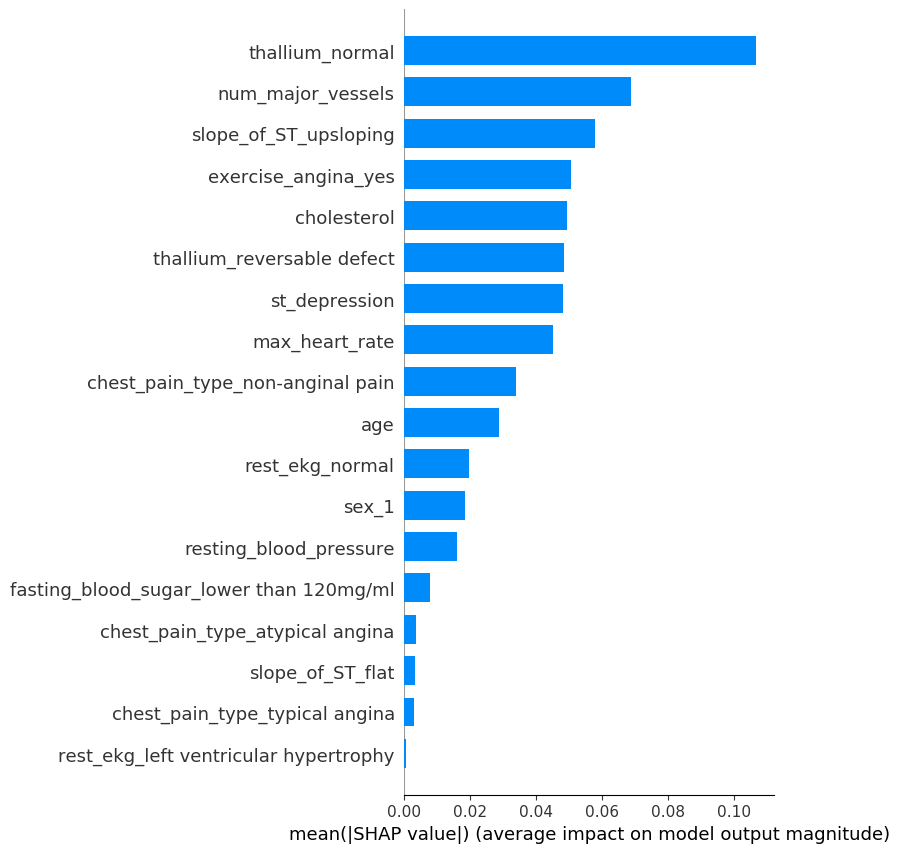

In [652]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

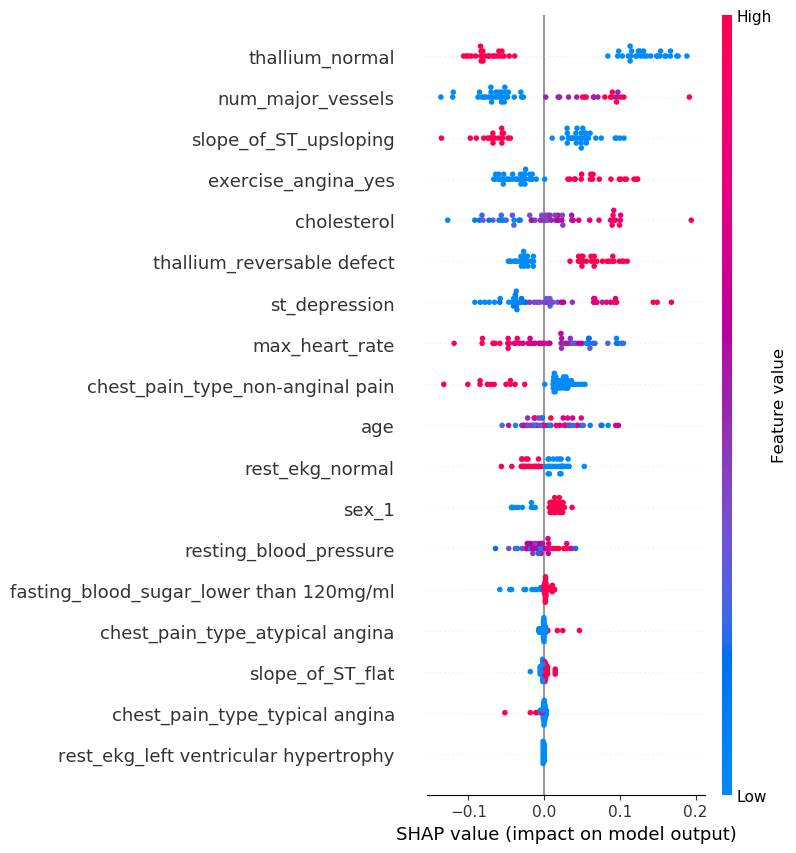

In [653]:
shap.summary_plot(shap_values[1], X_test)

In [675]:
def heart_disease_risk_pred(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [676]:

data_for_prediction = X_test.iloc[5,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)



In [678]:
data_for_prediction = X_test.iloc[12,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [679]:
data_for_prediction = X_test.iloc[2,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [680]:
data_for_prediction = X_test.iloc[7,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [682]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

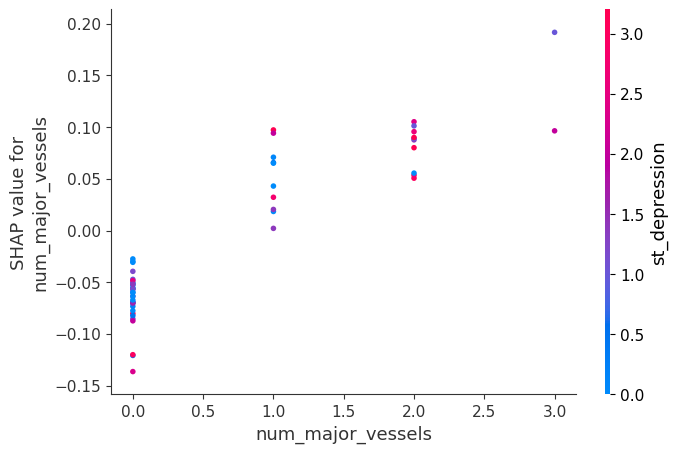

In [683]:
shap.dependence_plot('num_major_vessels', shap_values[1], X_test, interaction_index="st_depression")

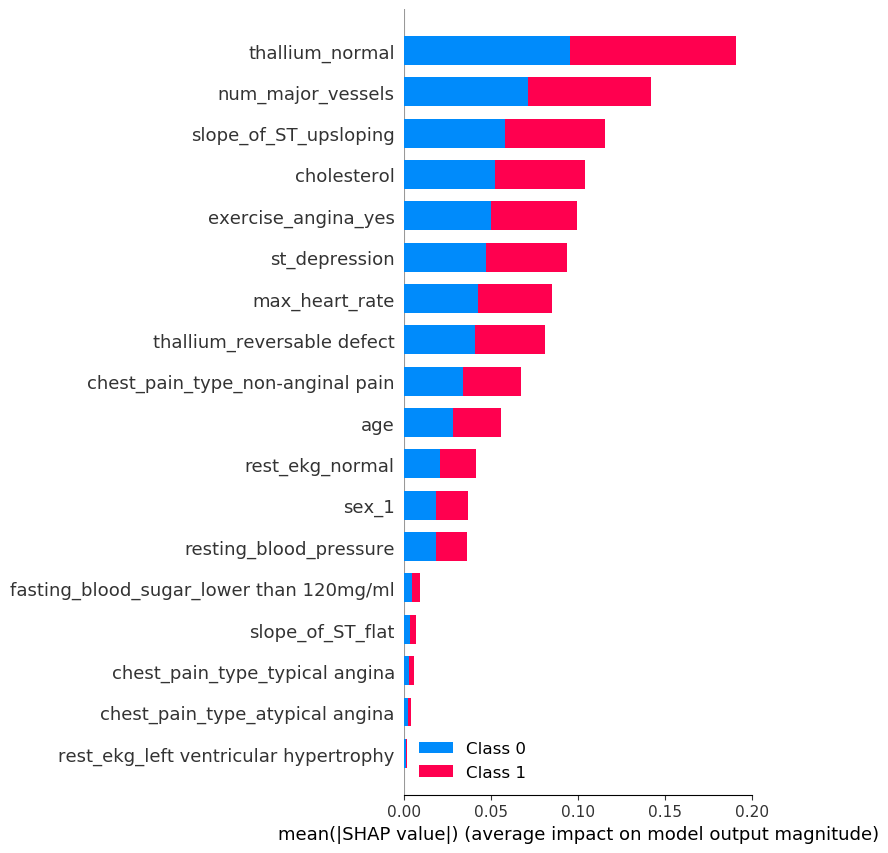

In [686]:

shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)


In [697]:
shap.initjs()

In [698]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:2], X_test.iloc[:2])


Support Vector Machine

> Indented block



In [382]:
X_train, X_test, y_train, y_test = train_test_split(dp.drop('target(HeartDisease)', 1), dp['target(HeartDisease)'], test_size=0.2, random_state=10)

preprocessing the data by scaling the features.

In [383]:
scaler = StandardScaler()

In [384]:
X_train_scaled = scaler.fit_transform(X_train)

In [385]:
X_test_scaled = scaler.transform(X_test)

Radial basis function (RBF) kernel

In [386]:
model = SVC(kernel='rbf')  
model.fit(X_train, y_train)

SVC()

In [387]:
y_pred = model.predict(X_test)

In [388]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0])
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])

In [389]:
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Confusion Matrix:
[[21  5]
 [ 6 22]]
Accuracy: 0.6296296296296297
Precision: 0.8333333333333334
Recall: 0.35714285714285715
F1-score: 0.5
Sensitivity: 0.7777777777777778
Specificity: 0.8148148148148148


In [390]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.92      0.71        26
           1       0.83      0.36      0.50        28

    accuracy                           0.63        54
   macro avg       0.70      0.64      0.60        54
weighted avg       0.71      0.63      0.60        54

